In [1]:
%%time

import pandas as pd

content = pd.read_csv('/kaggle/input/learning-equality-curriculum-recommendations/content.csv')

CPU times: user 11.7 s, sys: 1.53 s, total: 13.2 s
Wall time: 20.7 s


In [2]:
%%time

content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154047 entries, 0 to 154046
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                154047 non-null  object
 1   title             154038 non-null  object
 2   description       89456 non-null   object
 3   kind              154047 non-null  object
 4   text              74035 non-null   object
 5   language          154047 non-null  object
 6   copyright_holder  71821 non-null   object
 7   license           74035 non-null   object
dtypes: object(8)
memory usage: 9.4+ MB
CPU times: user 110 ms, sys: 4.56 ms, total: 115 ms
Wall time: 125 ms


In [3]:
%%time

# Check for missing values 
missing_values = content.isnull().sum()

missing_values

CPU times: user 108 ms, sys: 314 µs, total: 108 ms
Wall time: 106 ms


id                      0
title                   9
description         64591
kind                    0
text                80012
language                0
copyright_holder    82226
license             80012
dtype: int64

In [4]:
%%time

# Remove rows with missing values
content = content.dropna()

CPU times: user 136 ms, sys: 4.01 ms, total: 140 ms
Wall time: 138 ms


In [5]:
%%time

content.shape

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 12.6 µs


(41621, 8)

In [6]:
%%time

# Define features based on the categories

user_features = content[['language']]  # User features

ad_features = content[['title', 'description', 'kind', 'text', 'copyright_holder', 'license']]  # Ad features

contextual_features = content[['id', 'kind']]  # Contextual features

CPU times: user 6.44 ms, sys: 1.07 ms, total: 7.51 ms
Wall time: 7.93 ms


In [7]:
%%time

content.columns

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


Index(['id', 'title', 'description', 'kind', 'text', 'language',
       'copyright_holder', 'license'],
      dtype='object')

In [8]:
%%time

# Group by language to see how many content types (kind) are preferred by users
user_behavior_by_language = content.groupby('language')['kind'].value_counts().unstack()

user_behavior_by_language

CPU times: user 11 ms, sys: 2.72 ms, total: 13.7 ms
Wall time: 20.5 ms


kind,document,exercise,html5,video
language,,,,
ar,2.0,875.0,515.0,NaN
as,NaN,NaN,17.0,NaN
bg,NaN,NaN,NaN,2725.0
bn,NaN,1.0,14.0,6.0
en,6847.0,168.0,917.0,8974.0
es,9970.0,267.0,832.0,336.0
fr,1604.0,132.0,93.0,195.0
gu,31.0,18.0,43.0,882.0
hi,43.0,NaN,182.0,3.0


In [9]:
%%time

# Fill NaN values with the mean of each column
user_behavior_by_language.fillna(user_behavior_by_language.mean(), inplace=True)

CPU times: user 3.25 ms, sys: 34 µs, total: 3.28 ms
Wall time: 3.19 ms


In [10]:
%%time

# Group by language to see how many content types (kind) are preferred by users
user_behavior_by_language.head()

CPU times: user 121 µs, sys: 0 ns, total: 121 µs
Wall time: 120 µs


kind,document,exercise,html5,video
language,,,,
ar,2.000000,875.000000,515.000000,1102.6
as,1588.692308,209.428571,17.000000,1102.6
bg,1588.692308,209.428571,174.294118,2725.0
bn,1588.692308,1.000000,14.000000,6.0
en,6847.000000,168.000000,917.000000,8974.0


In [11]:
%%time

# Define "Process Video Metadata"
video_metadata = content[content['kind'] == 'video'][['title', 'description', 'text', 'language', 'copyright_holder', 'license']]

video_metadata

CPU times: user 14.2 ms, sys: 23 µs, total: 14.2 ms
Wall time: 13.9 ms


,title,description,text,language,copyright_holder,license
12,Ендомембранна система,"Преглед на мембранните структури, които образу...",В това видео ще разгледаме ендомембранната сис...,bg,Khan Academy,CC BY-NC-SA
14,Kuhesabu vizio mraba kutafuta kanuni ya eneo,Sal anatumia kizio mraba kuona kwa nini kuzidi...,"Nina mistatili mitatu hapa, na pia nina vipimo...",sw,Khan Academy,CC BY-NC-SA
18,Tangents of circles problem (example 2),Sal finds a missing angle using the property t...,Angle A is a circumscribed angle on circle O. ...,en,Khan Academy,CC BY-NC-SA
25,Разработен пример за идентифициране на проучва...,Разработен пример за идентифициране на проучва...,Нека разгледаме някои статистически проучвания...,bg,Khan Academy,CC BY-NC-SA
33,Primeros auxilios : Quemadura leve,En este vídeo te enseñamos cómo actuar en caso...,Este vídeo ha sido realizado en colaboración c...,es,Sikana Education,CC BY-NC-ND
...,...,...,...,...,...,...
153970,સમદ્વિબાજુ ત્રિકોણને લગતી સાબિતી,સલ સાબિત કરે છે કે સમદ્વિબાજુ ત્રિકોણના પાયાના...,"આપણે ત્રિકોણ (એ, બી,સી) થી શરૂવાત કરીએ છેઆકૃતિ...",gu,Khan Academy,CC BY-NC-SA
153978,"Somatic symptom disorder - causes, symptoms, d...",What is somatic symptom disorder? Somatic symp...,"Somatic symptom disorder, which used to be cal...",en,Open Osmosis (open.osmosis.org),CC BY-SA
154002,Consultant: The pros and cons of traveling for...,Tracy talks about making the most out of trave...,"So every, either Monday or Tuesday morning, I ...",en,Khan Academy,CC BY-NC-SA
154011,Шизоафективно разстройство,Посети (http://www.khanacademy.org/science/hea...,"Шизоафективните разстройства са тези, при коит...",bg,Khan Academy,CC BY-NC-SA


In [12]:
%%time

# Group by language to summarize user interaction with content
user_profiles = content.groupby('language').agg(
    preferred_content_type=('kind', lambda x: x.value_counts().idxmax()),  # Most frequent content type
    unique_content_interacted=('title', 'nunique')  # Number of unique titles interacted with
)

user_profiles

CPU times: user 42.5 ms, sys: 2.19 ms, total: 44.6 ms
Wall time: 44.2 ms


,preferred_content_type,unique_content_interacted
language,,
ar,exercise,1183
as,html5,13
bg,video,2716
bn,html5,21
en,video,16119
es,document,8169
fr,document,1701
gu,video,967
hi,html5,131


In [13]:
%%time

# Candidates Based on Similar Watch Histories

from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Create a watch history matrix where rows are languages, and columns are content types (kind)
watch_history_matrix = content.groupby(['language', 'kind']).size().unstack(fill_value=0)

# Calculate similarity between users (languages) based on their content consumption
similarity_matrix = pd.DataFrame(cosine_similarity(watch_history_matrix), 
                                 index=watch_history_matrix.index, 
                                 columns=watch_history_matrix.index)

# For each language, generate a list of similar users based on their watch history
similar_users = similarity_matrix.apply(lambda x: x.sort_values(ascending=False).index[1:], axis=1)

similar_users

CPU times: user 855 ms, sys: 43.8 ms, total: 899 ms
Wall time: 567 ms


language
ar     Index(['bn', 'as', 'te', 'ta', 'pnb', 'or', 'k...
as     Index(['pnb', 'ur', 'te', 'ta', 'kn', 'or', 'h...
bg     Index(['it', 'sw', 'gu', 'pt', 'en', 'my', 'bn...
bn     Index(['as', 'ur', 'te', 'ta', 'pnb', 'or', 'k...
en     Index(['pt', 'my', 'gu', 'it', 'sw', 'bg', 'pl...
es     Index(['zh', 'tr', 'fr', 'ru', 'pl', 'my', 'en...
fr     Index(['ru', 'es', 'pl', 'tr', 'zh', 'my', 'en...
gu     Index(['bg', 'sw', 'it', 'pt', 'en', 'bn', 'my...
hi     Index(['as', 'ur', 'ta', 'or', 'pnb', 'kn', 't...
it     Index(['it', 'sw', 'gu', 'pt', 'en', 'my', 'bn...
kn     Index(['pnb', 'ur', 'te', 'ta', 'kn', 'or', 'h...
mr     Index(['hi', 'as', 'te', 'or', 'kn', 'ur', 'pn...
my     Index(['pl', 'fr', 'ru', 'tr', 'zh', 'es', 'en...
or     Index(['pnb', 'ur', 'te', 'ta', 'kn', 'or', 'h...
pl     Index(['ru', 'tr', 'fr', 'es', 'zh', 'my', 'en...
pnb    Index(['pnb', 'ur', 'te', 'ta', 'kn', 'or', 'h...
pt     Index(['gu', 'en', 'bg', 'it', 'sw', 'my', 'pl...
ru     Index(['tr', 'p

In [14]:
%%time

# Feature Engineering

# User Feature: Watch history (number of videos watched per language)
user_features = content.groupby('language')['kind'].count().reset_index(name='videos_watched')

user_features

CPU times: user 10.1 ms, sys: 1.01 ms, total: 11.1 ms
Wall time: 11.6 ms


,language,videos_watched
0,ar,1392
1,as,17
2,bg,2725
3,bn,21
4,en,16906
5,es,11405
6,fr,2024
7,gu,974
8,hi,228
9,it,247


In [15]:
%%time

# Video Feature: Category of content (kind)
video_features = content[['title', 'kind']].drop_duplicates()

CPU times: user 21.5 ms, sys: 787 µs, total: 22.3 ms
Wall time: 20.8 ms


In [16]:
%%time

# Cross Feature: Interaction between language and content type (video or document)
cross_features = content.groupby(['language', 'kind']).size().unstack(fill_value=0).reset_index()

cross_features

CPU times: user 9.25 ms, sys: 2.04 ms, total: 11.3 ms
Wall time: 10.3 ms


kind,language,document,exercise,html5,video
0,ar,2,875,515,0
1,as,0,0,17,0
2,bg,0,0,0,2725
3,bn,0,1,14,6
4,en,6847,168,917,8974
5,es,9970,267,832,336
6,fr,1604,132,93,195
7,gu,31,18,43,882
8,hi,43,0,182,3
9,it,0,0,0,247


In [17]:
%%time

# Collaborative Filtering (SVD-based CF)
from sklearn.decomposition import TruncatedSVD

# Create the user-item interaction matrix (language vs. content type)
user_item_matrix = content.pivot_table(index='language', columns='kind', aggfunc='size', fill_value=0)

# Apply SVD for Collaborative Filtering
svd = TruncatedSVD(n_components=2)
user_latent_factors = svd.fit_transform(user_item_matrix)

# Recommend new content based on the similarity of user latent factors
recommended_content = svd.inverse_transform(user_latent_factors)

CPU times: user 101 ms, sys: 13.4 ms, total: 115 ms
Wall time: 197 ms


In [18]:
%%time

# Content-based Filtering (TF-IDF-based)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Use TF-IDF to extract features from video descriptions
tfidf = TfidfVectorizer(stop_words='english')
video_embeddings = tfidf.fit_transform(content['description'].fillna(''))

# Calculate cosine similarity between videos
similarity_matrix = cosine_similarity(video_embeddings)

CPU times: user 9.29 s, sys: 11.8 s, total: 21.1 s
Wall time: 21.1 s


In [19]:
%%time

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score

# Encode categorical data (language and video)
content['language_encoded'] = content['language'].astype('category').cat.codes
content['video_encoded'] = content['title'].astype('category').cat.codes

# Features and target
X = content[['language_encoded', 'video_encoded']]
y = (content['kind'] == 'video').astype(int)  # Assuming "video" as positive interaction

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost model with early stopping
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model with early stopping, monitoring validation error (eval_metric)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Validation set
    early_stopping_rounds=10,  # Stop if there's no improvement for 10 rounds
    eval_metric="logloss",  # Metric to monitor
    verbose=True  # Output the progress
)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)

# Output the F2 score
f2

[0]	validation_0-logloss:0.61878
[1]	validation_0-logloss:0.57661
[2]	validation_0-logloss:0.54171
[3]	validation_0-logloss:0.51255
[4]	validation_0-logloss:0.48639
[5]	validation_0-logloss:0.46520
[6]	validation_0-logloss:0.44596
[7]	validation_0-logloss:0.43020
[8]	validation_0-logloss:0.41603
[9]	validation_0-logloss:0.40115
[10]	validation_0-logloss:0.38847
[11]	validation_0-logloss:0.37734
[12]	validation_0-logloss:0.36710
[13]	validation_0-logloss:0.35910
[14]	validation_0-logloss:0.35341
[15]	validation_0-logloss:0.34624
[16]	validation_0-logloss:0.34096
[17]	validation_0-logloss:0.33612
[18]	validation_0-logloss:0.33103
[19]	validation_0-logloss:0.32680
[20]	validation_0-logloss:0.32264
[21]	validation_0-logloss:0.31942
[22]	validation_0-logloss:0.31577
[23]	validation_0-logloss:0.31199
[24]	validation_0-logloss:0.30957
[25]	validation_0-logloss:0.30769
[26]	validation_0-logloss:0.30537
[27]	validation_0-logloss:0.30409
[28]	validation_0-logloss:0.30204
[29]	validation_0-loglos

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.28579
[40]	validation_0-logloss:0.28508
[41]	validation_0-logloss:0.28462
[42]	validation_0-logloss:0.28314
[43]	validation_0-logloss:0.28189
[44]	validation_0-logloss:0.28141
[45]	validation_0-logloss:0.28061
[46]	validation_0-logloss:0.28008
[47]	validation_0-logloss:0.27973
[48]	validation_0-logloss:0.27853
[49]	validation_0-logloss:0.27752
[50]	validation_0-logloss:0.27715
[51]	validation_0-logloss:0.27601
[52]	validation_0-logloss:0.27546
[53]	validation_0-logloss:0.27461
[54]	validation_0-logloss:0.27436
[55]	validation_0-logloss:0.27311
[56]	validation_0-logloss:0.27279
[57]	validation_0-logloss:0.27209
[58]	validation_0-logloss:0.27112
[59]	validation_0-logloss:0.27086
[60]	validation_0-logloss:0.27054
[61]	validation_0-logloss:0.26948
[62]	validation_0-logloss:0.26868
[63]	validation_0-logloss:0.26849
[64]	validation_0-logloss:0.26830
[65]	validation_0-logloss:0.26750
[66]	validation_0-logloss:0.26729
[67]	validation_0-logloss:0.26702
[68]	validatio

0.9111751219798954

In [20]:
%%time

# Top-N Recommendations

# Generate user-video pairs
users = content['language_encoded'].unique()
videos = content['video_encoded'].unique()

# Create all user-video pairs
user_video_pairs = pd.MultiIndex.from_product([users, videos], names=['language_encoded', 'video_encoded']).to_frame(index=False)

# Predict scores for all user-video pairs
X_all = user_video_pairs.copy()

# Ensure the feature names match the ones used during training (language_encoded, video_encoded)
X_all['language_encoded'] = X_all['language_encoded'].astype(int)
X_all['video_encoded'] = X_all['video_encoded'].astype(int)

# Predict interaction scores using the trained model
X_all['interaction_score'] = xgb_model.predict_proba(X_all[['language_encoded', 'video_encoded']])[:, 1]  # Probability of interaction

# Rank videos for each user and select top-N
N = 5  # Number of recommendations to serve
top_n_recommendations = X_all.groupby('language_encoded').apply(lambda x: x.nlargest(N, 'interaction_score')).reset_index(drop=True)

top_n_recommendations

CPU times: user 2.23 s, sys: 14.7 ms, total: 2.25 s
Wall time: 712 ms


<timed exec>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


,language_encoded,video_encoded,interaction_score
0,0,1320,0.030659
1,0,1307,0.030659
2,0,1311,0.030659
3,0,1318,0.030659
4,0,1354,0.030659
...,...,...,...
115,23,22160,0.597031
116,23,22151,0.597031
117,23,22025,0.597031
118,23,22200,0.597031


<timed exec>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


CPU times: user 237 ms, sys: 116 ms, total: 353 ms
Wall time: 158 ms


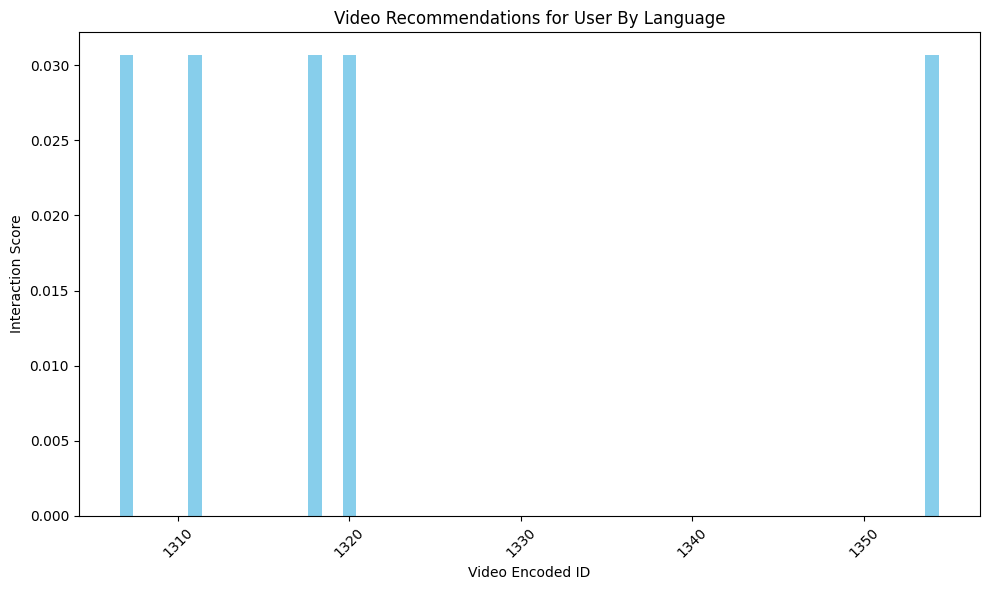

In [22]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N recommendations grouped by language (user)
top_n_recommendations_sorted = top_n_recommendations.groupby('language_encoded').apply(lambda x: x.nlargest(N, 'interaction_score')).reset_index(drop=True)

first_user_recommendations = top_n_recommendations_sorted[top_n_recommendations_sorted['language_encoded'] == top_n_recommendations_sorted['language_encoded'].unique()[0]]

# Create a bar chart for top-N recommendations for the first user

plt.figure(figsize=(10, 6))
plt.bar(first_user_recommendations['video_encoded'], first_user_recommendations['interaction_score'], color='skyblue')
plt.title("Video Recommendations for User By Language")
plt.xlabel('Video Encoded ID')
plt.ylabel('Interaction Score')
plt.xticks(rotation=45)
plt.tight_layout()